In [1]:
import numpy as np
from scipy import stats

from tqdm import tqdm

import arviz as ar
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# MCMC: Metropolis-Hastings

[**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) is a Markov Chain Monte Carlo (**MCMC**) sampling technique.




## Code

We'll implement the **Metropolis-Hastings** algorithm to estimate Beta-Binomial posterior.

In [11]:
def get_posterior(data, theta, alpha=1, beta=1):
    
    if 0 <= theta <= 1:
        prior = stats.beta(alpha, beta).pdf(theta)
        likelihood = stats.bernoulli(theta).pmf(data).prod()
        prob = likelihood * prior
    else: 
        return -np.inf
    
    return prob

In [54]:
# Params
SAMPLE_SIZE = 100
N_ITERS = 1000

CANDIDATE_SD = .05

alpha = beta = 1
theta = .5

In [55]:
# Generate data
data = stats.bernoulli(.7).rvs(SAMPLE_SIZE)

In [56]:
# Metropolis-Hastings

# Initialize trace
trace = {
    'theta': np.zeros(N_ITERS)
}

# Compute posterior
posterior_init = get_posterior(data, theta, alpha, beta)

for i in tqdm(range(N_ITERS)):
    theta_candidate = stats.norm(theta, CANDIDATE_SD).rvs(1)
    posterior_new = get_posterior(data, theta_candidate, alpha, beta)
    proba_accept = posterior_new / posterior_init
    
    if proba_accept > stats.uniform(0, 1).rvs(1):
        theta = theta_candidate
        posterior_init = posterior_new
        
    trace['theta'][i] = theta

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.09it/s]


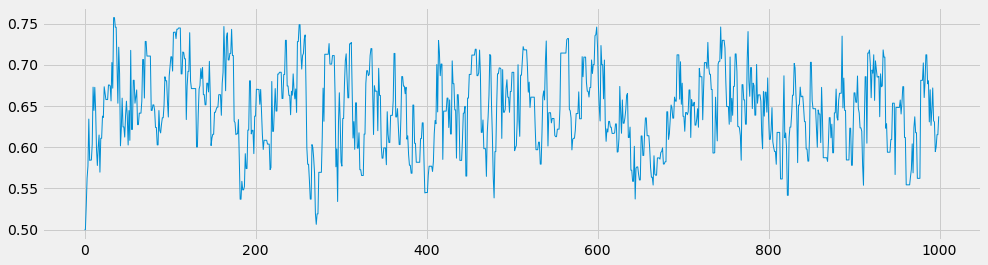

In [57]:
# Plot trace
plt.figure(figsize=(15, 4))
plt.plot(trace['theta'], lw=1)
plt.show()

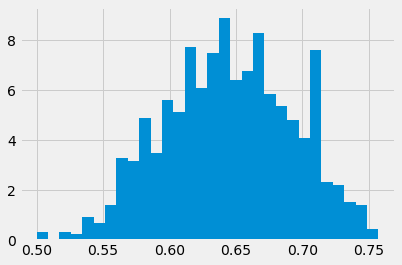

In [58]:
plt.hist(trace['theta'], density=True, bins=30)
plt.show()

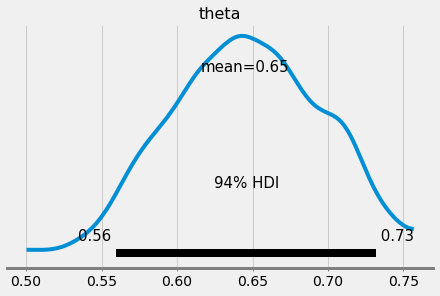

In [59]:
ar.plot_posterior(trace)
plt.show()